In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, CubicSpline, BarycentricInterpolator, krogh_interpolate
from scipy.optimize import fsolve

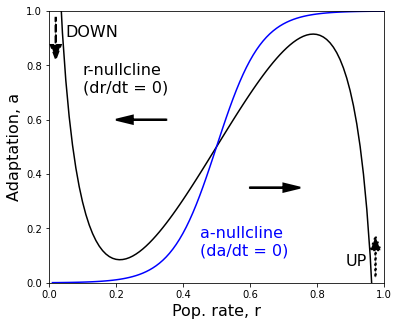

In [39]:

# Define the parameters for the equations
w, b = 6.0, 1.0  # Interaction strengths
I = 2.5  # External input
x_0, r_0 = 5, 0.5  # Midpoints of the sigmoid functions
k = 15.0  # Slope of the A_inf sigmoid function

# Define the activation functions as lambda functions
# R_inf = lambda x: 1 / (1 + np.exp(-(x - x_0)))
A_inf = lambda r: 1 / (1 + np.exp(-k * (r - r_0)))

# Calculate nullcline values using a vectorized approach
r = np.linspace(0.01, 0.999, 100)  # r range from 0 to 1

r_nullcline = (1/b)*(w*r + I - x_0 - np.log(r/(1-r)))  # r-nullcline values
a_nullcline = A_inf(r)  # a-nullcline values

# Plot the nullclines
plt.figure(figsize=(6, 5))  # Adjust the figure size to match the example
plt.plot(r, r_nullcline, label='', color='black')  # Black for r-nullcline
plt.plot(r, a_nullcline, label='', color='blue')   # Blue for a-nullcline
# plt.title('Nullclines in the r-a phase plane')


# Add the UP and DOWN labels
plt.text(0.05, 0.95, 'DOWN', fontsize=16, verticalalignment='top', horizontalalignment='left')
plt.text(0.95, 0.05, 'UP', fontsize=16, verticalalignment='bottom', horizontalalignment='right')

plt.xlim(0, 1)
plt.ylim(0, 1)

# Adding bold arrows to indicate direction of trajectory
plt.arrow(0.02, 0.975, 0.0, -0.1, head_width=0.03, head_length=0.05, fc='black', ec='black', linestyle='dashed', linewidth=2)
# For UP direction to indicate direction of trajectory
plt.arrow(0.975, 0.02, 0.0, 0.1, head_width=0.03, head_length=0.05, fc='Black', ec='black', linestyle='dotted', linewidth=2)

# Adding bold arrows to indicate direction of trajectory
plt.arrow(0.35, 0.6, -0.1, 0.0, head_width=0.03, head_length=0.05, fc='black', ec='black', linewidth=2)
# For UP direction to indicate direction of trajectory
plt.arrow(0.6, 0.35, 0.1, 0.0, head_width=0.03, head_length=0.05, fc='black', ec='black', linewidth=2)

plt.xlim(0, 1)
plt.ylim(0, 1)


# Annotate the nullclines with directional text
plt.annotate('r-nullcline\n(dr/dt = 0)', xy=(r[5], r_nullcline[5]), xytext=(0.1, 0.7),
             arrowprops=None, fontsize=16, color='black')
plt.annotate('a-nullcline\n(da/dt = 0)', xy=(r[40], a_nullcline[40]), xytext=(0.45, 0.1),
             arrowprops=None, fontsize=16, color='blue')

# Set the axes labels and title
plt.xlabel('Pop. rate, r', fontsize=16)
plt.ylabel('Adaptation, a', fontsize=16)
# plt.title('Model Dynamics in r-a phase plane')

# # Save the plot
plt.savefig(f"./plots/final/nullclines_ra.svg")

# Show grid
plt.grid(False)

# Show the plot
plt.show()


In [34]:
def plot_ss_nullclines(w, b, I, initial_guess, regime):
    """
    Plots the nullclines for the given parameters.

    Parameters:
    w (float): Interaction strength.
    b (float): Interaction strength.
    I (float): External input.
    """

    # Fixed parameters
    x_0 = 5    # Midpoint of the sigmoid function for x
    r_0 = 0.5  # Midpoint of the sigmoid function for r
    k = 15.0   # Slope of the A_inf sigmoid function

    # Define the activation function
    A_inf = lambda r: 1 / (1 + np.exp(-k * (r - r_0)))

    # Calculate nullcline values
    r = np.linspace(0.001, 0.999, 400)  # r range from 0 to 1
    r_nullcline = (1/b)*(w*r + I - x_0 - np.log(r/(1-r)))  # r-nullcline values
    a_nullcline = A_inf(r)  # a-nullcline values

    # Find intersection points
    # r_interp = interp1d(r, r_nullcline - a_nullcline, fill_value="extrapolate")
    # print(r_interp.size())
    ss_eqn = lambda r: (1/b)*(w*r + I - x_0 - np.log(r/(1-r))) - A_inf(r)

    # r_interp = CubicSpline(r, r_nullcline-a_nullcline)
    r_intersect = fsolve(ss_eqn, initial_guess)  # Guess values for intersections
    r_ss = np.unique(np.round(r_intersect, 3))
    a_ss = A_inf(r_ss)



    # Determine stability (placeholder method - replace with actual method)
    def is_stable(r, a):
        # Define the Jacobian matrix based on the screenshot
        J = np.array([[-1 + w * r * (1 - r), -b * r * (1 - r)],
                  [1 * a * (1 - a), -1]])
        # Calculate eigenvalues
        eigenvalues = np.linalg.eigvals(J)

        # Check stability: system is stable if the real parts of all eigenvalues are negative
        is_stable = np.all(np.real(eigenvalues) < 0)
    # Implement the logic to determine if a point is stable or not
        return is_stable

    # Plot the nullclines
    plt.figure(figsize=(6, 5))
    plt.plot(r, r_nullcline, label='r-nullcline', color='black')
    plt.plot(r, a_nullcline, label='a-nullcline', color='blue')
    # plt.plot(r, r_nullcline-a_nullcline, label="r-a")

    # Mark intersections
    print(len(r_ss))
    for i in range(len(r_ss)):
        if is_stable(r_ss[i],a_ss[i]):
            plt.plot(r_ss[i], a_ss[i], 'ro', fillstyle='full', markersize=12, markeredgewidth=2)  # Stable: filled circle
        else:
            plt.plot(r_ss[i], a_ss[i], 'ro', fillstyle='none', markersize=12, markeredgewidth=2)  # Unstable: empty circle

    # plt.title('r-a phase plane')
    plt.xlim(0, 1)
    plt.ylim(0, 1)  
    # Set axes labels and title
    plt.xlabel('Pop. rate', fontsize=20)
    plt.ylabel('Adaptation', fontsize=20)

    plt.gca().set_xticklabels([])
    plt.gca().set_yticklabels([]) 

    # Save the plot
    plt.savefig(f"./plots/final/nullclines_trajectory_{regime}.svg")

    # Show grid and plot
    plt.grid(False)
    plt.show()

1


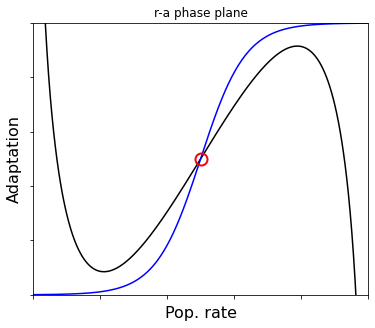

5


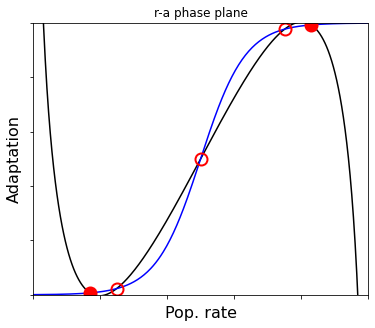

3


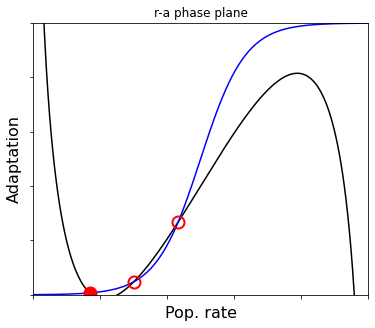

3


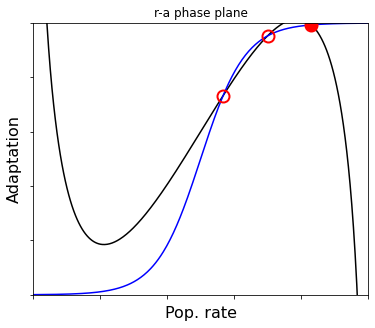

In [35]:
# (c) Oscillatory
plot_ss_nullclines(w=6.0, b=1.0, I=2.5, initial_guess = [0.5], regime="Oscillatory")

# (d) Bistable
plot_ss_nullclines(w=6.3, b=1.0, I=2.35, initial_guess= [0.15, 0.25, 0.5, 0.75, 0.85], regime="Bistable")

# (e) Excitable_DOWN
plot_ss_nullclines(w=6.0, b=1.0, I=2.4, initial_guess= [0.15, 0.3, 0.45], regime="Excitable_DOWN")

# (f) Excitable_UP
plot_ss_nullclines(w=6.0, b=1.0, I=2.6, initial_guess= [0.55, 0.65, 0.85], regime="Excitable_UP")


In [16]:
def steady_state(w, b, I, vis, regime):  
    x_0 = 5    # Midpoint of the sigmoid function for x
    r_0 = 0.5  # Midpoint of the sigmoid function for r
    k = 15.0   # Slope of the A_inf sigmoid function

    # Define the activation function
    A_inf = lambda r: 1 / (1 + np.exp(-k * (r - r_0)))

    ss_eqn = lambda r: (1/b)*(w*r + I - x_0 - np.log(r/(1-r))) - A_inf(r)
    v = np.linspace(0.01,0.99,20)

    ss = np.ones(len(v))
    for i in range(len(v)):
        ss[i] = ss_eqn(v[i])

    r_intersect = fsolve(ss_eqn, vis)  # Guess values for intersections
    r_ss = np.unique(np.round(r_intersect, 3))
    a_ss = A_inf(r_ss)

    plt.figure(figsize=(6, 5))

    for i in range(len(r_ss)):
        plt.plot(r_ss[i], 0, 'ro', fillstyle='full')  # Stable: filled circle

    plt.axhline(y=0, color='black', linestyle='--')  # Plot a horizontal line at y=0
    plt.plot(v, ss, label="r-a")
    plt.show()


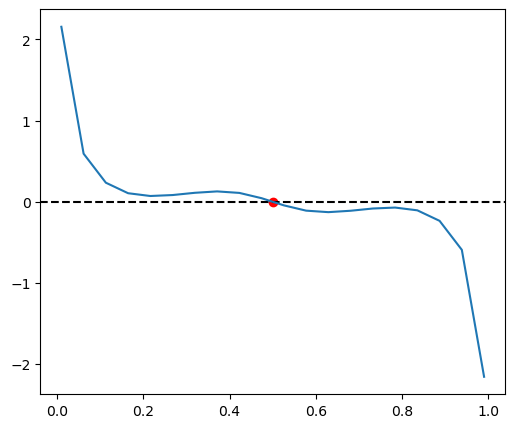

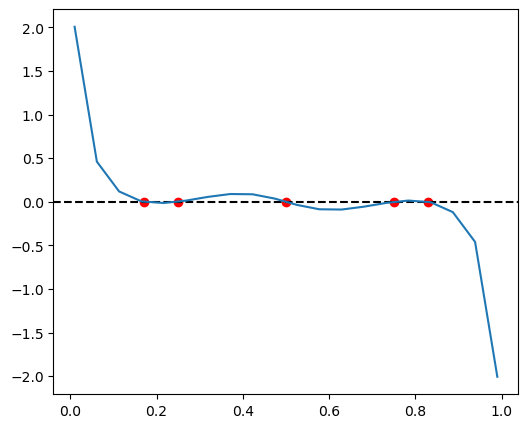

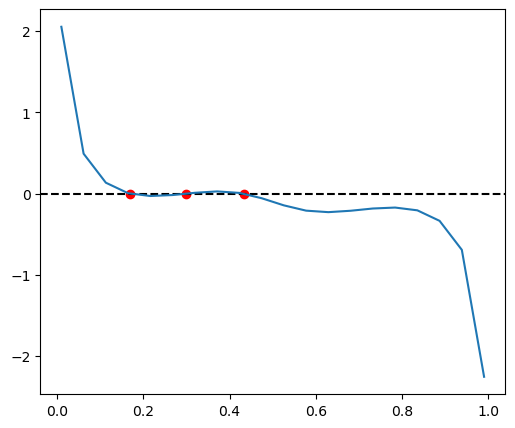

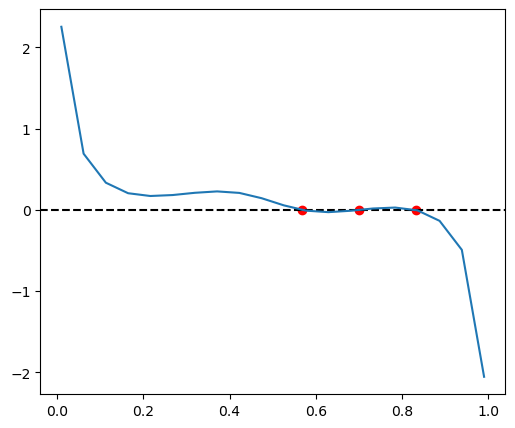

In [25]:
# (c) Oscillatory 
# vis = [0.4, 0.5, 0.6]
steady_state(w=6.0, b=1.0, I=2.5, vis = [0.5], regime="Oscillatory")

# (d) Bistable
# vis = [0.2, 0.5, 0.8]
steady_state(w=6.3, b=1.0, I=2.35, vis = [0.15, 0.25, 0.5, 0.75, 0.85], regime="Bistable")

# (e) Excitable_DOWN
# vis = [0.2, 0.3, 0.4]
steady_state(w=6.0, b=1.0, I=2.4, vis = [0.15, 0.3, 0.45], regime="Excitable_DOWN")

# (f) Excitable_UP
# vis = [0.4, 0.5, 0.6]
steady_state(w=6.0, b=1.0, I=2.6, vis = [0.55, 0.65, 0.85], regime="Excitable_UP")

In [11]:
from sympy import symbols, Eq, solve, diff, exp, Matrix

# Define symbols
r, a, w, b, I, x_0, r_0, k, tau_r, tau_a = symbols('r a w b I x_0 r_0 k tau_r tau_a')

# Define the sigmoidal activation functions
R_inf = 1 / (1 + exp(-(w * r - b * a + I - x_0)))
A_inf = 1 / (1 + exp(-k * (r - r_0)))

# Define the ODEs
drdt = -r + R_inf
dadt = -a + A_inf

# Find equilibrium points by solving drdt = 0 and dadt = 0
equilibrium_points = solve([Eq(drdt, 0), Eq(dadt, 0)], (r, a))

# Analyze stability at the equilibrium points
for eq_pt in equilibrium_points:
    # Compute the Jacobian matrix
    J = Matrix([[diff(drdt, r), diff(drdt, a)], [diff(dadt, r), diff(dadt, a)]])
    J_at_eq_pt = J.subs([(r, eq_pt[0]), (a, eq_pt[1])])

    # Find the eigenvalues of the Jacobian matrix
    eigenvalues = J_at_eq_pt.eigenvals()

    # Analyze the eigenvalues for stability and Hopf bifurcation
    stability = all([ev.as_real_imag()[0] < 0 for ev in eigenvalues.keys()])
    hopf_bifurcation = any([ev.as_real_imag()[0] == 0 and ev.as_real_imag()[1] != 0 for ev in eigenvalues.keys()])

    print(f'Equilibrium point: {eq_pt}, Stability: {stability}, Hopf bifurcation: {hopf_bifurcation}')


NotImplementedError: could not solve -r*(exp(I - b*exp(k*(r - r_0))/(exp(k*(r - r_0)) + 1) + r*w - x_0) + 1) + exp(I - b*exp(k*(r - r_0))/(exp(k*(r - r_0)) + 1) + r*w - x_0)

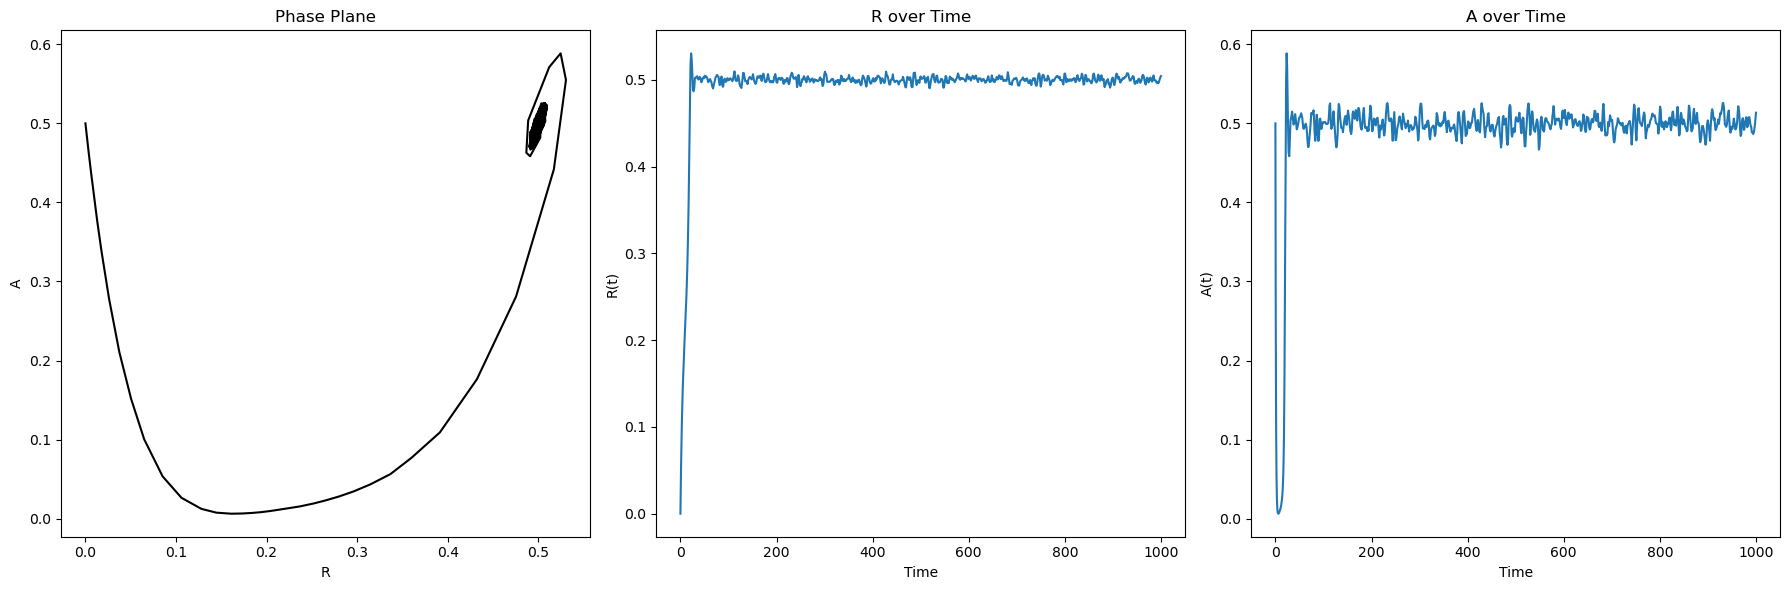

In [36]:
import math 
from scipy.integrate import solve_ivp

w=6.0
b=1.0
I=2.5
# Fixed parameters
x_0 = 5    # Midpoint of the sigmoid function for x
r_0 = 0.5  # Midpoint of the sigmoid function for r
k = 15.0   # Slope of the A_inf sigmoid function

# Define the activation function
A_inf = lambda r: 1 / (1 + np.exp(-k * (r - r_0)))
R_inf = lambda x: 1 / (1 + np.exp(-(x - x_0)))

# Constants for the noise process
theta = 0.05
sigma = 0.25
dt = 0.01  # This should be the time step of your simulation

# Function to update the Ornstein-Uhlenbeck noise
def update_noise(xi, dt):
    dW = np.random.normal(0, np.sqrt(dt))
    return xi - theta * xi * dt + sigma * np.sqrt(2 * theta) * dW

def fhn_ode(t, y, xi):
    # w = 
    # b = 
    # I = 
    r, a = y
    noise = update_noise(xi, dt)
    # I = Iconstant + Islope*t
    # x_0 = ...  # Define the value of x_0 based on your model
    R_inf = lambda x: 1 / (1 + np.exp(-(x - x_0)))
    # r_0 = ...  # Define the value of r_0 based on your model
    # k = ...    # Define the slope k of the sigmoid function
    A_inf = lambda r: 1 / (1 + np.exp(-k * (r - r_0)))
    
    drdt = -r + R_inf(w*r - b*a + I + noise)
    dadt = -a + A_inf(r)
    return [drdt, dadt]

fin = 1000
tspan = [0, fin]

r0 = np.linspace(0,0,1)
a0 = np.linspace(0.5,0.5,1)

# Set up the plot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Set up a figure with subplots

# Simulate and plot for each initial condition
for i in range(len(r0)):
    xi = 0.0  # Reset the noise term for each simulation
    sol = solve_ivp(lambda t, y: fhn_ode(t, y, xi), tspan, [r0[i], a0[i]], method='RK45', vectorized=True)
    
    # Plot results in the phase plane
    axs[0].plot(sol.y[0], sol.y[1], 'k')
    
    # Plot V(t)
    axs[1].plot(sol.t, sol.y[0])
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('R(t)')
    
    # Plot W(t)
    axs[2].plot(sol.t, sol.y[1])
    axs[2].set_xlabel('Time')
    axs[2].set_ylabel('A(t)')

# Set titles and labels
axs[0].set_title('Phase Plane')
axs[0].set_xlabel('R')
axs[0].set_ylabel('A')
axs[1].set_title('R over Time')
axs[2].set_title('A over Time')

# Show the plot
plt.tight_layout()
plt.show()

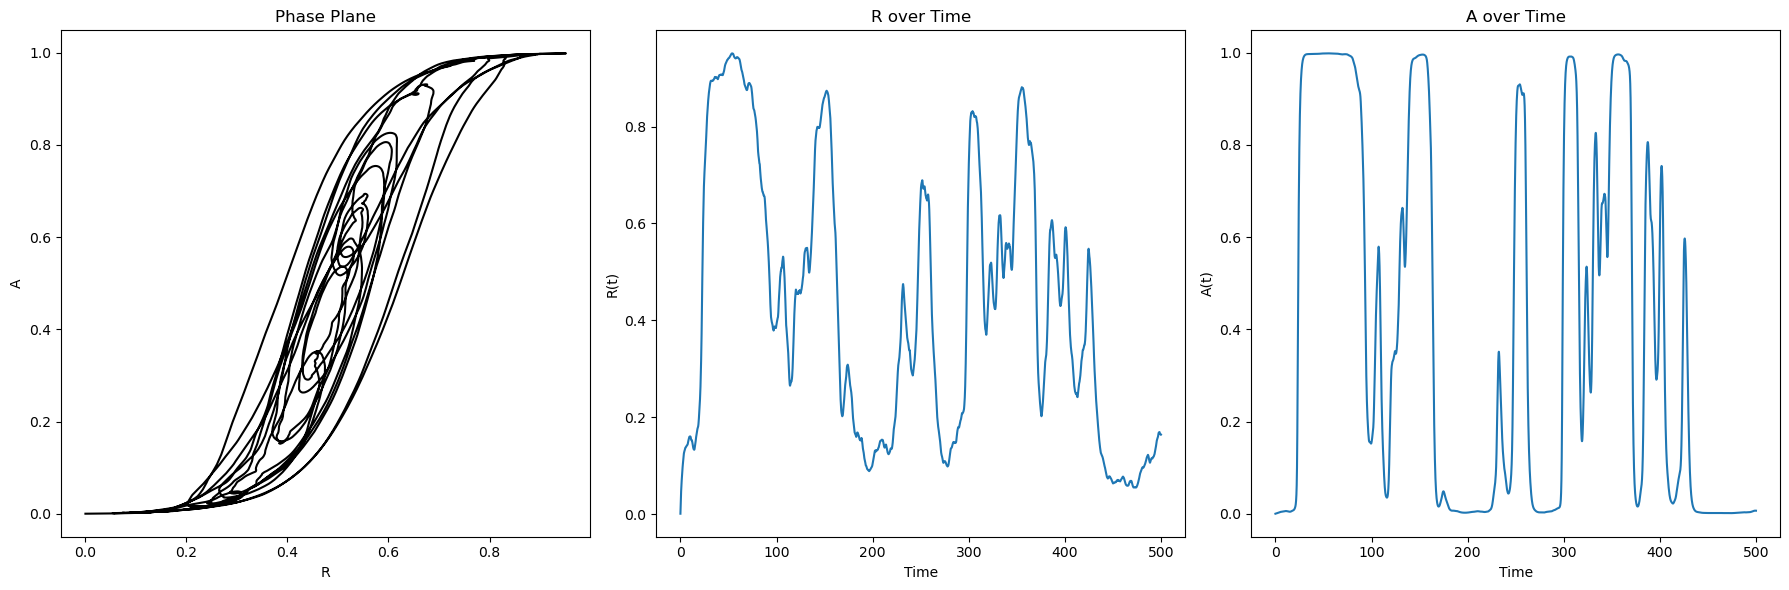

In [35]:
w=6.0
b=1.0
I=2.5
# Fixed parameters
x_0 = 5    # Midpoint of the sigmoid function for x
r_0 = 0.5  # Midpoint of the sigmoid function for r
k = 15.0   # Slope of the A_inf sigmoid function

# Constants for the noise process
theta = 0.05
sigma = 0.25
dt = 0.01  # This should be the time step of your simulation

# Update the Ornstein-Uhlenbeck noise
def update_noise(xi):
    dW = np.random.normal(0, np.sqrt(dt))
    return xi - theta * xi * dt + sigma * np.sqrt(2 * theta) * dW

def fhn_ode(r, a, w, b, I, xi):
    # x_0 = ...  # Define the value of x_0 based on your model
    R_inf = lambda x: 1 / (1 + np.exp(-(x - x_0)))
    # r_0 = ...  # Define the value of r_0 based on your model
    # k = ...    # Define the slope k of the sigmoid function
    A_inf = lambda r: 1 / (1 + np.exp(-k * (r - r_0)))
    
    drdt = -r + R_inf(w*r - b*a + I + xi)
    dadt = -a + A_inf(r)
    
    return drdt, dadt

# Time span for the simulation
fin = 500
num_steps = int(fin / dt)
t = np.linspace(0, fin, num_steps)

# Initial conditions arrays
r0 = np.linspace(0,0,1)
a0 = np.linspace(0,0,1)

# Set up the plot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Simulate and plot for each initial condition
for R_initial, A_initial in zip(r0, a0):
    r = R_initial
    a = A_initial
    xi = 0.0  # Initial noise term
    r_values = []
    a_values = []
    
    for i in range(num_steps):
        drdt, dadt = fhn_ode(r, a, w, b, I, xi)
        r += drdt * dt
        a += dadt * dt
        xi = update_noise(xi)
        r_values.append(r)
        a_values.append(a)
    
    # Plot results in the phase plane
    axs[0].plot(r_values, a_values, 'k')
    
    # Plot V(t)
    axs[1].plot(t, r_values)
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('R(t)')
    
    # Plot W(t)
    axs[2].plot(t, a_values)
    axs[2].set_xlabel('Time')
    axs[2].set_ylabel('A(t)')

# Set titles and labels
axs[0].set_title('Phase Plane')
axs[0].set_xlabel('R')
axs[0].set_ylabel('A')
axs[1].set_title('R over Time')
axs[2].set_title('A over Time')

# Show the plot
plt.tight_layout()
plt.show()


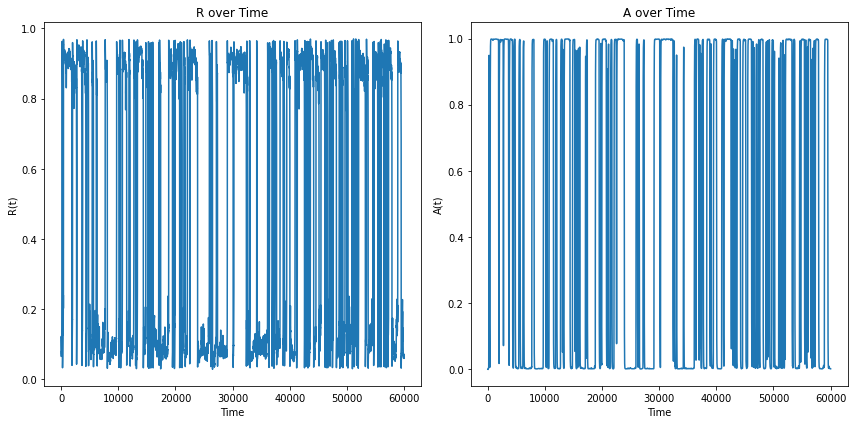

In [9]:
import numpy as np
import matplotlib.pyplot as plt

w = 6
b = 1.0
I = 2.5
# Fixed parameters
x_0 = 5    # Midpoint of the sigmoid function for x
r_0 = 0.5  # Midpoint of the sigmoid function for r
k = 15.0   # Slope of the A_inf sigmoid function
tau_a = 20

# Constants for the noise process
theta = 0.05
sigma = 0.25
dt = 1.0  # Updated time step for the simulation

# Update the Ornstein-Uhlenbeck noise
def update_noise(xi):
    dW = np.random.normal(0, np.sqrt(0.05))  # Updated time step for the noise
    return xi - theta * xi * 0.05 + sigma * np.sqrt(2 * theta) * dW

def fhn_ode(r, a, w, b, I, xi):
    R_inf = lambda x: 1 / (1 + np.exp(-(x - x_0)))
    A_inf = lambda r: 1 / (1 + np.exp(-k * (r - r_0)))
    
    drdt = -r + R_inf(w*r - b*a + I + xi)
    dadt = (-a + A_inf(r))/tau_a
    
    return drdt, dadt

# Time span for the simulation
fin = 60000
num_steps = int(fin / dt)
t = np.linspace(0, fin, num_steps)

# Initial conditions arrays
r0 = np.linspace(0,0,1)
a0 = np.linspace(0,0,1)

# Set up the plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Simulate and plot for each initial condition
for R_initial, A_initial in zip(r0, a0):
    r = R_initial
    a = A_initial
    xi = 0.0  # Initial noise term
    r_values = []
    a_values = []
    
    for i in range(num_steps):
        drdt, dadt = fhn_ode(r, a, w, b, I, xi)
        r += drdt * dt
        a += dadt * dt
        xi = update_noise(xi)
        r_values.append(r)
        a_values.append(a)

# Assuming you will want to visualize or analyze the results here.
    axs[0].plot(t, r_values)
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('R(t)')
    
    # Plot W(t)
    axs[1].plot(t, a_values)
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('A(t)')


axs[0].set_title('R over Time')
axs[1].set_title('A over Time')

# Show the plot
plt.tight_layout()
plt.show()

Mean Squared Error: 0.10446820552910942


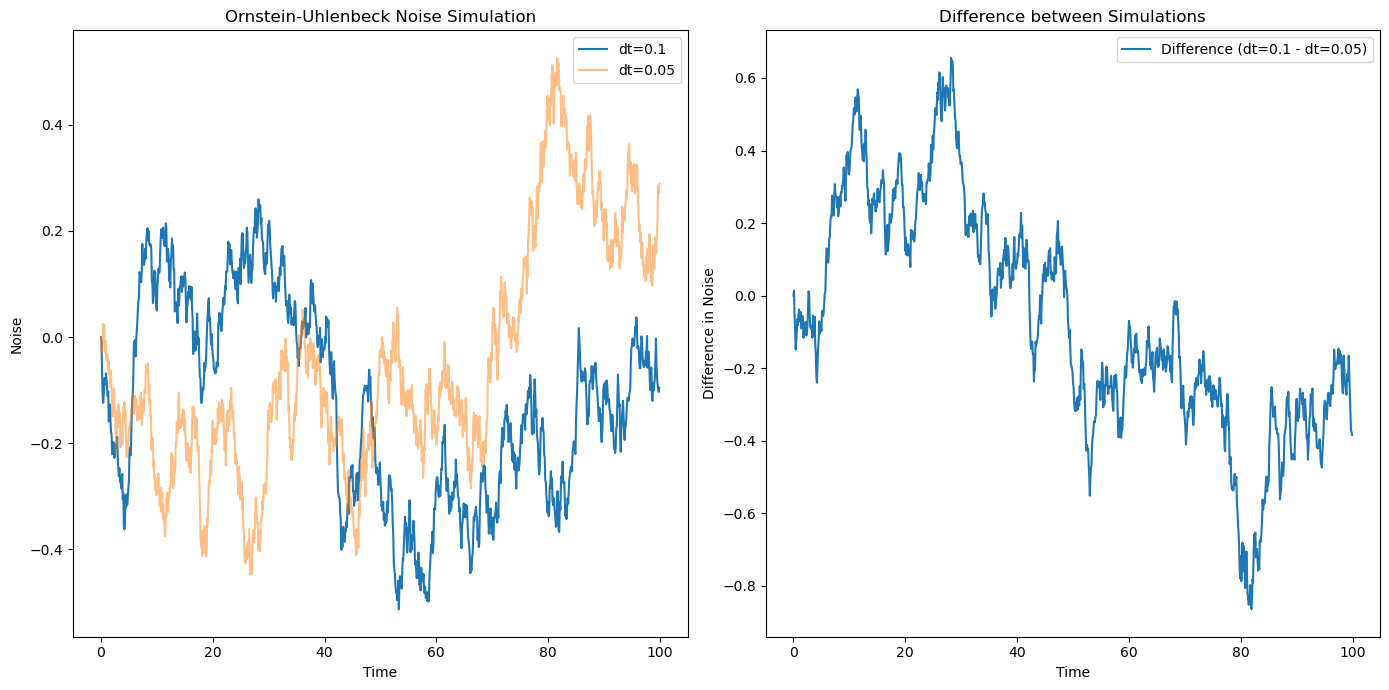

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Ornstein-Uhlenbeck process as a function
def simulate_OU(theta, sigma, dt, total_time):
    n = int(total_time / dt)
    xi = np.zeros(n)
    for t in range(1, n):
        xi[t] = xi[t - 1] - theta * xi[t - 1] * dt + sigma * np.sqrt(2 * theta * dt) * np.random.normal()
    return xi

# Parameters for the Ornstein-Uhlenbeck process
theta = 0.05  # Time scale
sigma = 0.25  # Standard deviation
total_time = 100  # Total time for the simulation

# Simulate with dt = 0.1
dt_1 = 0.1
xi_1 = simulate_OU(theta, sigma, dt_1, total_time)

# Simulate with dt = 0.05
dt_2 = 0.05
xi_2 = simulate_OU(theta, sigma, dt_2, total_time)

# Interpolate xi_2 at the time points of xi_1 for direct comparison
time_1 = np.arange(0, total_time, dt_1)
time_2 = np.arange(0, total_time, dt_2)
xi_2_interpolated = np.interp(time_1, time_2, xi_2)

# Calculate the mean squared error between the two simulations
mse = np.mean((xi_1 - xi_2_interpolated)**2)
print(f"Mean Squared Error: {mse}")

# Plot both simulations for visual comparison
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(time_1, xi_1, label='dt=0.1')
plt.plot(time_2, xi_2, label='dt=0.05', alpha=0.5)
plt.title('Ornstein-Uhlenbeck Noise Simulation')
plt.xlabel('Time')
plt.ylabel('Noise')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time_1, xi_1 - xi_2_interpolated, label='Difference (dt=0.1 - dt=0.05)')
plt.title('Difference between Simulations')
plt.xlabel('Time')
plt.ylabel('Difference in Noise')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

def R_inf(x, k, n):
    return k*np.maximum(x, 0)**n

k=3

w=6.0
b=1.0
I=2.5
# Fixed parameters
x_0 = 5    # Midpoint of the sigmoid function for x
r_0 = 0.5  # Midpoint of the sigmoid function for r
k = 15.0   # Slope of the A_inf sigmoid function

# Constants for the noise process
theta = 0.05
sigma = 0.25
dt = 1  # This should be the time step of your simulation
tau_a = 200
tau_r = 5

# Update the Ornstein-Uhlenbeck noise
def update_noise(xi):
    dW = np.random.normal(0, np.sqrt(dt))
    return xi - theta * xi * dt + sigma * np.sqrt(2 * theta) * dW

def fhn_ode(r, a, w, b, I, xi):
    # x_0 = ...  # Define the value of x_0 based on your model
    # R_inf = lambda x: 1 / (1 + np.exp(-(x - x_0)))
    R_e_i_inf = lambda x: k*np.maximum(x,0)**n
    
    # r_0 = ...  # Define the value of r_0 based on your model
    # k = ...    # Define the slope k of the sigmoid function
    A_inf = lambda r: 1 / (1 + np.exp(-k * (r - r_0)))
    
    dre_dt = -r_e + R_e_i_inf(w_ee*r_e - w_ei*r_i - b*a I + xi)
    dri_dt = -r_i + R_e_i_inf(w_ie*r_e - w_ii*r_i)
    da_dt = (-a + A_inf(r))/tau_a
    
    return drdt, dadt

# Time span for the simulation
fin = 500
num_steps = int(fin / dt)
t = np.linspace(0, fin, num_steps)

# Initial conditions arrays
r0 = np.linspace(0,0,1)
a0 = np.linspace(0,0,1)

# Set up the plot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Simulate and plot for each initial condition
for R_initial, A_initial in zip(r0, a0):
    r = R_initial
    a = A_initial
    xi = 0.0  # Initial noise term
    r_values = []
    a_values = []
    
    for i in range(num_steps):
        drdt, dadt = fhn_ode(r, a, w, b, I, xi)
        r += drdt * dt
        a += dadt * dt
        xi = update_noise(xi)
        r_values.append(r)
        a_values.append(a)
    
    # Plot results in the phase plane
    axs[0].plot(r_values, a_values, 'k')
    
    # Plot V(t)
    axs[1].plot(t, r_values)
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('R(t)')
    
    # Plot W(t)
    axs[2].plot(t, a_values)
    axs[2].set_xlabel('Time')
    axs[2].set_ylabel('A(t)')

# Set titles and labels
axs[0].set_title('Phase Plane')
axs[0].set_xlabel('R')
axs[0].set_ylabel('A')
axs[1].set_title('R over Time')
axs[2].set_title('A over Time')

# Show the plot
plt.tight_layout()
plt.show()



